In [1]:
%load_ext autoreload
%autoreload 2
import json
import os
import sys

import keras.backend as K
from keras.models import load_model
from keras.optimizers import Adam
import numpy as np
import tensorflow as tf

from dataset_utils import adni_loader
#from networks import transform_network_utils

# sys.path.append('../neuron')
# sys.path.append('../voxelmorph/src')
# from dense_3D_spatial_transformer import Dense3DSpatialTransformer
# sys.path.append('../voxelmorph-sandbox/')
# import voxelmorph.losses as vm_losses

gpu_ids = [1]
# set gpu id and tf settings
os.environ['CUDA_VISIBLE_DEVICES']=','.join([str(g) for g in gpu_ids])
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.tensorflow_backend.set_session(tf.Session(config=config))



Using TensorFlow backend.
../cnn_utils/vis_utils.py:14: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  mpl.use('Agg')


Load GLT experiment

In [2]:
import json
import os
import sys

sys.path.append('../cnn_utils')
import file_utils
from experiments_VTE import GLTExperimentClass

load_from_dir = ('./experiments/GLT_adni-unnorm-masked_100ul_subj-l-to-subjs_ims160-192-224-1'
'_voxelmorph2guha_flow_color_unet16-32-32-32_dec64-64-32-32-32-32-32_lr0.0005_'
                 'pt1000_frzflow_grad_l2_regfwt1_cc_vm_wt1_win9_grad-seg-l2_regcwt2_l2_sigI0.1')

with open(os.path.join(load_from_dir, 'arch_params.json'), 'r') as f:
	arch_params = json.load(f)
with open(os.path.join(load_from_dir, 'data_params.json'), 'r') as f:
	data_params = json.load(f)

from experiments_VTE import GLTExperimentClass	
exp = GLTExperimentClass.ExperimentGlobalLocalTransforms(data_params, arch_params)
model_name = exp.get_model_name()

model_name, exp_dir, figures_dir, logs_dir, models_dir = file_utils.make_output_dirs(model_name, prompt_delete=False)
exp.save_exp_info(exp_dir, figures_dir, models_dir, logs_dir)

exp.load_data()

# create models and load existing ones if necessary
exp.create_models()



[2018-10-31 00:29:15] Loading adni dataset adni-unnorm-masked_100ul_subj-l
[2018-10-31 00:29:15] Params: {'dataset_name': 'adni', 'source_name': 'atl', 'target_name': 'subjs', 'unnormalized': True, 'masked': True, 'n_shot': 1, 'use_atlas_as_source': False, 'use_subject': 'ABIDE_50435_mri_talairach_orig', 'img_shape': [160, 192, 224, 1], 'pred_img_shape': [160, 192, 1], 'aug_img_shape': [160, 192, 224, 1], 'n_unlabeled': 100, 'n_validation': 50, 'load_vols': True, 'aug_in_gen': True, 'n_flow_aug': None, 'use_labels': [0, 16, 10, 49, 8, 47, 4, 43, 7, 46, 12, 51, 2, 41, 28, 60, 11, 50, 13, 52, 17, 53, 14, 15, 18, 54, 24, 3, 42, 31, 63], 'final_test': False, 'warp_labels': True, 'n_dims': 3, 'split_id': None, 'orig_img_shape': (160, 192, 224, 1), 'scale': 1.0, 'source_train_files': ['/data/ddmg/voxelmorph/data/t1_mix/proc/resize256-crop_x32/train/origs/ABIDE_50435_mri_talairach_orig.npz'], 'source_test_files': ['/data/ddmg/voxelmorph/data/t1_mix/proc/resize256-crop_x32/train/origs/ABIDE_50

Got list of 7329 files from /data/ddmg/voxelmorph/data/t1_mix/proc/resize256-crop_x32/train/origs/*.npz:
ADNI_ADNI-3T-FS-5.3-Long_293689.long.016_S_4591_base_mri_talairach_orig.npz
ADNI_ADNI-3T-FS-5.3-Long_78841.long.016_S_1326_base_mri_talairach_orig.npz
ADNI_ADNI-1.5T-FS-5.3-Long_436815.long.094_S_1330_base_mri_talairach_orig.npz
ADNI_ADNI-3T-FS-5.3-Long_296323.long.068_S_2168_base_mri_talairach_orig.npz
ADNI_ADNI-3T-FS-5.3-Long_388923.long.135_S_5273_base_mri_talairach_orig.npz
ADNI_ADNI-3T-FS-5.3-Long_272700.long.009_S_4388_base_mri_talairach_orig.npz
ADNI_ADNI-1.5T-FS-5.3-Long_394785.long.027_S_0408_base_mri_talairach_orig.npz
PPMI_3519_mri_talairach_orig.npz
ADNI_ADNI-3T-FS-5.3-Long_119158.long.053_S_0507_base_mri_talairach_orig.npz
ADNI_ADNI-1.5T-FS-5.3-Long_63306.long.007_S_0249_base_mri_talairach_orig.npz
ABIDE_50685_mri_talairach_orig.npz
ADNI_ADNI-1.5T-FS-5.3-Long_121666.long.041_S_1423_base_mri_talairach_orig.npz
GSP_120719_TT88SP_FS_mri_talairach_orig.npz
COBRE_0040043_mri

In [3]:

# compile models for training
load_epoch = 1010#'latest'
start_epoch = exp.load_models(models_dir, load_epoch)
exp.compile_models()

exp.create_generators(batch_size=1)



Saving vm2_guha_wrapper
[(None, 160, 192, 224, 1), (None, 160, 192, 224, 3)]
[2018-10-31 00:32:17] Switching trainer model to SequentialUnets
[2018-10-31 00:32:17] __________________________________________________________________________________________________
[2018-10-31 00:32:17] Layer (type)                    Output Shape         Param #     Connected to                     
[2018-10-31 00:32:17] ==================================================================================================
[2018-10-31 00:32:17] img_input_src (InputLayer)      (None, 160, 192, 224 0                                            
[2018-10-31 00:32:17] __________________________________________________________________________________________________
[2018-10-31 00:32:17] img_input_tgt (InputLayer)      (None, 160, 192, 224 0                                            
[2018-10-31 00:32:17] __________________________________________________________________________________________________
[2018-10-31

[2018-10-31 00:32:18] Looking for models in ./experiments/GLT_adni-unnorm-masked_100ul_subj-l-to-subjs_ims160-192-224-1_voxelmorph2guha_flow_color_unet16-32-32-32_dec64-64-32-32-32-32-32_lr0.0005_pt1000_frzflow_grad_l2_regfwt1_cc_vm_wt1_win9_grad-seg-l2_regcwt2_l2_sigI0.1/models
[2018-10-31 00:32:18] Loading model vm2_guha_wrapper from ./experiments/GLT_adni-unnorm-masked_100ul_subj-l-to-subjs_ims160-192-224-1_voxelmorph2guha_flow_color_unet16-32-32-32_dec64-64-32-32-32-32-32_lr0.0005_pt1000_frzflow_grad_l2_regfwt1_cc_vm_wt1_win9_grad-seg-l2_regcwt2_l2_sigI0.1/models/vm2_guha_wrapper_epoch1010_iter101000.h5
[2018-10-31 00:32:18] Loading model color_delta_unet from ./experiments/GLT_adni-unnorm-masked_100ul_subj-l-to-subjs_ims160-192-224-1_voxelmorph2guha_flow_color_unet16-32-32-32_dec64-64-32-32-32-32-32_lr0.0005_pt1000_frzflow_grad_l2_regfwt1_cc_vm_wt1_win9_grad-seg-l2_regcwt2_l2_sigI0.1/models/color_delta_unet_epoch1010_iter101000.h5
[2018-10-31 00:32:18] Trainer model
[2018-10-31 00

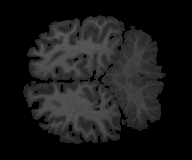

In [4]:
import IPython
import PIL
source_X = exp.dataset.X_labeled_train#adni_loader._load_vol_and_seg(ds.files_labeled_train[0], load_seg=False, mask_vol=ds.params['masked'])
IPython.display.display(PIL.Image.fromarray((source_X[0, :, :, 64, 0]*255).astype(np.uint8)))



In [5]:
sys.path.append('../voxelmorph/src')
from dense_3D_spatial_transformer import Dense3DSpatialTransformer

voxelmorph_model = load_model(
    #'/afs/csail.mit.edu/u/x/xamyzhao/voxelmorph/models/vm2_cc.h5',
    './experiments/voxelmorph/vm2_cc.h5',#.format(start_iter),
    custom_objects={'Dense3DSpatialTransformer': Dense3DSpatialTransformer},
    compile=False,
)


['/data/ddmg/voxelmorph/data/t1_mix/proc/resize256-crop_x32/train/origs/ADNI_ADNI-3T-FS-5.3-Long_263697.long.153_S_4077_base_mri_talairach_orig.npz', '/data/ddmg/voxelmorph/data/t1_mix/proc/resize256-crop_x32/train/origs/ADNI_ADNI-3T-FS-5.3-Long_223532.long.153_S_2109_base_mri_talairach_orig.npz', '/data/ddmg/voxelmorph/data/t1_mix/proc/resize256-crop_x32/train/origs/ADNI_ADNI-1.5T-FS-5.3-Long_76615.long.021_S_0984_base_mri_talairach_orig.npz', '/data/ddmg/voxelmorph/data/t1_mix/proc/resize256-crop_x32/train/origs/ADNI_ADNI-3T-FS-5.3-Long_451346.long.009_S_0751_base_mri_talairach_orig.npz', '/data/ddmg/voxelmorph/data/t1_mix/proc/resize256-crop_x32/train/origs/GSP_100329_NW33DK_FS_mri_talairach_orig.npz', '/data/ddmg/voxelmorph/data/t1_mix/proc/resize256-crop_x32/train/origs/ADNI_ADNI-3T-FS-5.3-Long_282668.long.002_S_4270_base_mri_talairach_orig.npz', '/data/ddmg/voxelmorph/data/t1_mix/proc/resize256-crop_x32/train/origs/GSP_110314_JD99RH_FS_mri_talairach_orig.npz', '/data/ddmg/voxelmo

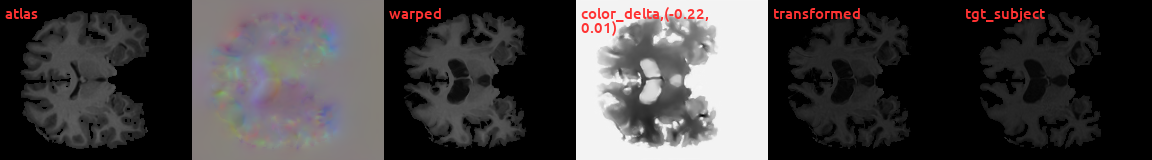

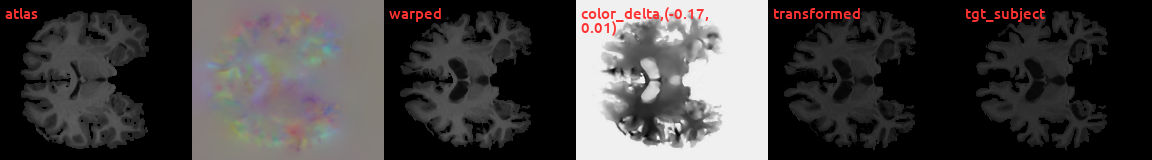

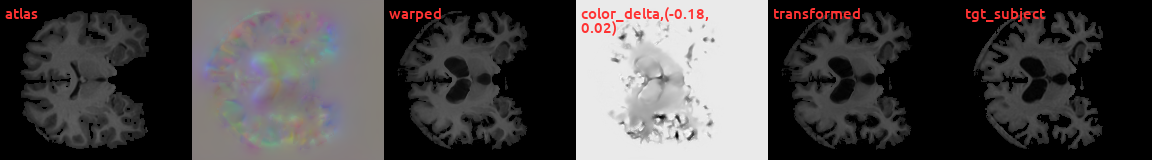

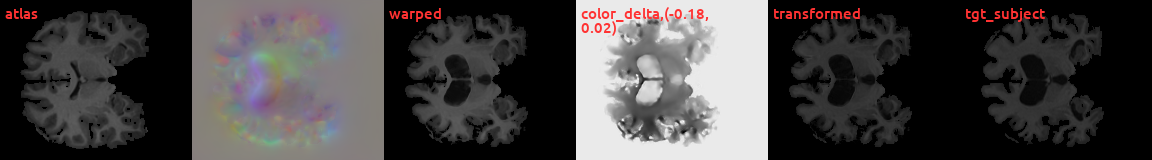

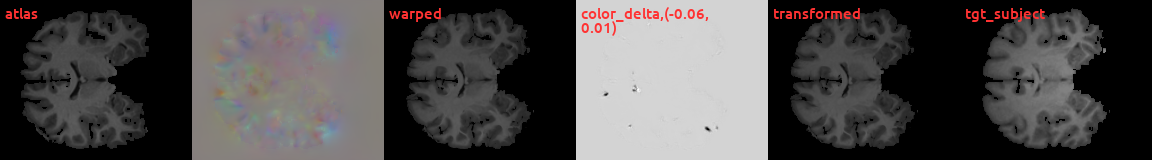

Test targets


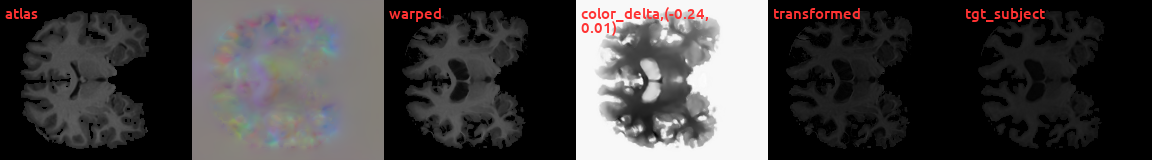

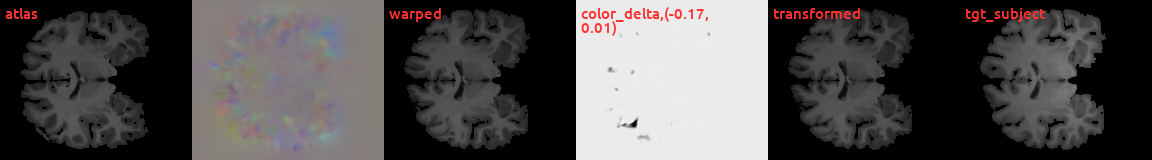

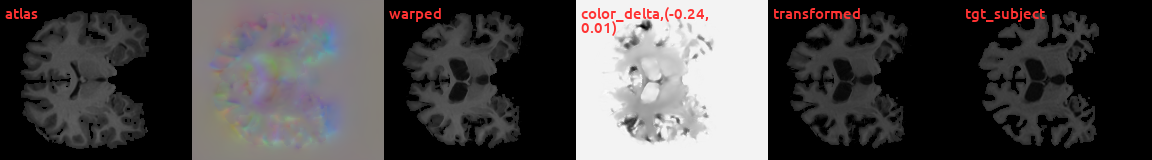

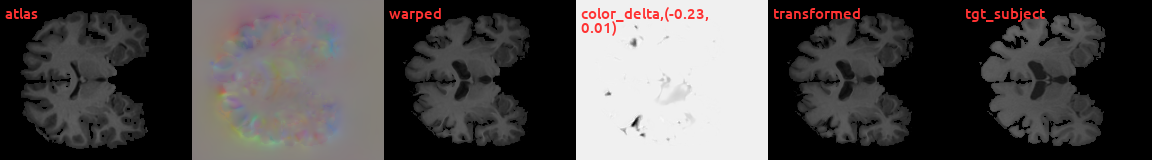

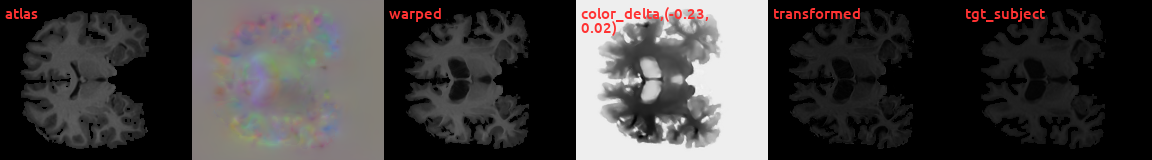

In [9]:
import vis_utils
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important;  }</style>"))
n_examples = 5
train_vol_gen = exp.dataset.gen_vols_batch(['unlabeled_train'], batch_size=1, randomize=False, load_segs=False)
test_vol_gen = exp.dataset.gen_vols_batch(['labeled_valid'], batch_size=1, randomize=False, load_segs=False)
print(exp.dataset.files_unlabeled_train)
print(exp.dataset.files_labeled_valid)
min_h = 160
vm_model = exp.tester_model
#vm_model = voxelmorph_model

for ei in range(n_examples * 2):
    if ei == 0:
        print('Training targets')        
    elif ei == n_examples:
        print('Test targets')
        
    if ei < n_examples:
        target_X, _ = next(train_vol_gen)
    else:
        target_X, _ = next(test_vol_gen)
   
    slice_idx = 112
    
    preds = vm_model.predict([source_X, target_X])
    
    
    if len(preds) > 2:
        flow = preds[0]
        warped = preds[1]
        color_delta = preds[2]
        transformed = preds[3]
    else:
        flow = preds[1]
        warped = preds[0]

    flow_im, _, _ = vis_utils.flow_to_im(flow[0, :, :, slice_idx], clip_flow=20)
    
    out_ims = [
        vis_utils.label_ims(source_X[:, :, :, slice_idx], 'atlas', display_h=min_h),
        flow_im,
        vis_utils.label_ims(warped[:, :, :, slice_idx], 'warped', display_h=min_h),
    ]
    if len(preds) > 2:
        out_ims += [
            vis_utils.label_ims(color_delta[:, :, :, slice_idx], 'color_delta', normalize=True, display_h=min_h),
            vis_utils.label_ims(transformed[:, :, :, slice_idx], 'transformed', display_h=min_h),
        ]
    
    out_ims += [vis_utils.label_ims(target_X[:, :, :, slice_idx], 'tgt_subject', display_h=min_h)]
    out_im = np.concatenate(out_ims, axis=1)
    IPython.display.display(PIL.Image.fromarray((out_im[..., [2, 0, 1]]).astype(np.uint8)))
    

In [ ]:
IPython.display.display(PIL.Image.fromarray(source_X[0, :, :, 112, :]))
IPython.display.display(PIL.Image.fromarray(target_X[0, :, :, 112, :]))
preds = voxelmorph_model.predict([source_X, target_X])
IPython.display.display(PIL.Image.fromarray(target_X[0, :, :, 112, :]))


In [ ]:
# save a voxelmorph wrapper

from keras.layers import Input, Lambda
from keras.models import Model, load_model
import sys
sys.path.append('../voxelmorph/src')
from dense_3D_spatial_transformer import Dense3DSpatialTransformer



import os
import tensorflow as tf
import keras.backend as K
gpu_ids = [2]
# set gpu id and tf settings
os.environ['CUDA_VISIBLE_DEVICES']=','.join([str(g) for g in gpu_ids])
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.tensorflow_backend.set_session(tf.Session(config=config))



voxelmorph_model = load_model(
    #'/afs/csail.mit.edu/u/x/xamyzhao/voxelmorph/models/vm2_cc.h5',
    './experiments/voxelmorph/vm2_cc_AtoUMS_newdataset_iter100000.h5',#.format(start_iter),
    custom_objects={'Dense3DSpatialTransformer': Dense3DSpatialTransformer},
    compile=False,
)

vol_shape = (160, 224, 192, 1)
input_src = Input(vol_shape)
input_tgt = Input(vol_shape)

warped, flow = voxelmorph_model([input_src, input_tgt])
flow = Lambda(lambda x:tf.gather(x, [1, 0, 2], axis=-1))(flow)  # reverse rows, cols

wrapper_model = Model(inputs=[input_src, input_tgt], outputs=[flow, warped], name='vm2_cc_wrapper')
wrapper_model.summary()
wrapper_model.save('./experiments/voxelmorph/vm2_cc_AtoUMS_newdataset_iter100000_wrapper.h5')